<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 


In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving lakeerie.txt to lakeerie.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

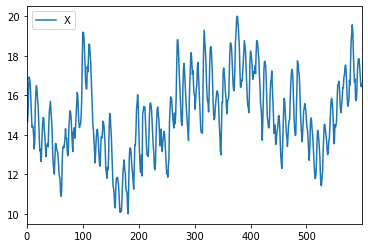

In [7]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [9]:
len(data)

600

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax

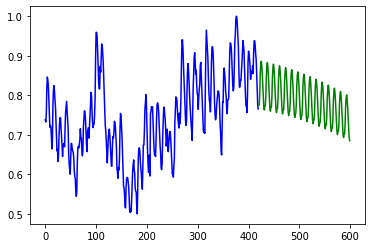

In [10]:
# Load/split the data
train, test = train_test_split(data_n, train_size=420)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:420], train, c='blue')
plt.plot(x[420:], forecasts, c='green')
plt.show()

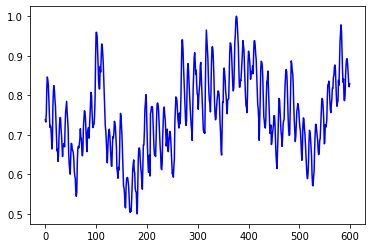

In [11]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [13]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.007762161468342267


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [15]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 12) (constant=True); AIC=-1902.115, BIC=-1869.812, Time=3.186 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=-1602.766, BIC=-1594.691, Time=0.075 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=-1786.700, BIC=-1770.549, Time=1.115 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=-1740.646, BIC=-1724.494, Time=1.195 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=-1604.765, BIC=-1600.727, Time=0.024 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 1, 12) (constant=True); AIC=-1755.021, BIC=-1726.756, Time=2.842 seconds
Fit ARIMA: (2, 1, 2)x(1, 0, 0, 12) (constant=True); AIC=-1785.064, BIC=-1756.799, Time=3.500 seconds
Fit ARIMA: (2, 1, 2)x(2, 0, 1, 12) (constant=True); AIC=-1908.638, BIC=-1872.297, Time=11.988 seconds
Fit ARIMA: (2, 1, 2)x(2, 0, 0, 12) (constant=True); AIC=-1839.944, BIC=-1807.641, Time=9.728 seconds
Fit ARIMA: (2, 1, 2)x(2, 0, 2, 12) (constant=T

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [17]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(180)
    print(forecasts)

[0.77617499 0.78200191 0.8094112  0.85900219 0.88140714 0.88743907
 0.87724689 0.85745577 0.8292242  0.80618538 0.78464861 0.77837351
 0.79024894 0.79180652 0.81974735 0.86340423 0.88360593 0.88977053
 0.87902993 0.86052637 0.83091677 0.80537133 0.78081654 0.77299491
 0.78426019 0.78791269 0.81430177 0.86028767 0.88131538 0.88724662
 0.8772495  0.85851521 0.83075012 0.80764815 0.78583494 0.77927694
 0.79060728 0.79279726 0.81939234 0.86243222 0.88227093 0.88818095
 0.87803304 0.86005756 0.83197929 0.80802056 0.78510973 0.77794434
 0.78889843 0.79198984 0.81764111 0.86126727 0.88126832 0.88702005
 0.87730783 0.85942151 0.83244398 0.80980498 0.78833295 0.78179896
 0.79267626 0.79509989 0.82058665 0.86248011 0.88175898 0.88744698
 0.87777421 0.86040965 0.83357589 0.81079597 0.78906364 0.78233356
 0.79294185 0.79574146 0.82056233 0.86229088 0.88144765 0.88701268
 0.87763563 0.86049361 0.83442126 0.81245587 0.79157839 0.78519774
 0.79567088 0.79815437 0.82265757 0.86320622 0.8818547  0.8873

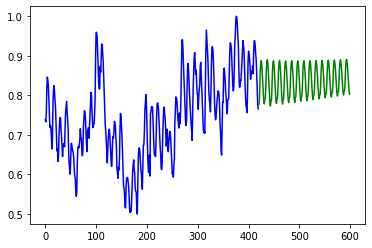

In [18]:
x = np.arange(data_n.shape[0])
plt.plot(x[:420], train, c='blue')
plt.plot(x[420:], forecasts, c='green')
plt.show()

In [19]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.010845692193358153
